In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [105]:
df = pd.read_csv("virat.csv")

In [106]:
df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17


In [107]:
df.dtypes

Runs          object
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [108]:
## Your code here
df['Runs'] = df['Runs'].apply(lambda x:x.strip('*')).astype('int64')

In [109]:
df.Runs.dtypes

dtype('int64')

In [110]:
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


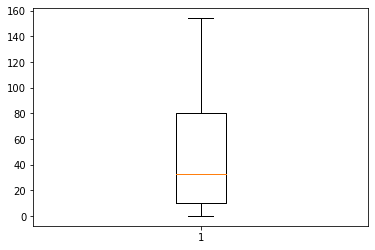

In [111]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [112]:
## Your code here

# new column containing year
df['Year'] = pd.DatetimeIndex(df['Start Date']).year

In [113]:
#groupby on Year

df_year = df.groupby(by = 'Year').sum()
df_year

,Runs,BF,4s,6s,Pos,Inns
Year,,,,,,
2008,159,239,21,1,7,7
2009,230,257,26,1,29,9
2010,726,829,69,4,50,26
2011,1302,1500,121,7,119,49
2012,444,538,36,1,34,17
2013,1100,1088,120,19,69,36
2014,995,976,89,19,56,28
2015,304,376,15,7,33,15
2016,739,739,62,8,30,16


In [114]:
# find the most matches played in a year
df['Year'].value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [115]:
# create a new column containing avg 
df_year['Avg'] = df_year['Runs']/df_year['Inns']
df_year

,Runs,BF,4s,6s,Pos,Inns,Avg
Year,,,,,,,
2008,159,239,21,1,7,7,22.714286
2009,230,257,26,1,29,9,25.555556
2010,726,829,69,4,50,26,27.923077
2011,1302,1500,121,7,119,49,26.571429
2012,444,538,36,1,34,17,26.117647
2013,1100,1088,120,19,69,36,30.555556
2014,995,976,89,19,56,28,35.535714
2015,304,376,15,7,33,15,20.266667
2016,739,739,62,8,30,16,46.187500


In [116]:
# find max avg in which year
df_year[df_year.Avg == df_year.Avg.max()]

,Runs,BF,4s,6s,Pos,Inns,Avg
Year,,,,,,,
2016,739,739,62,8,30,16,46.1875


In [117]:
# find max run in a single match in which year
df[df.Runs == df.Runs.max()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,2016


In [ ]:
# First, you have to do some formatting to the ‘Start Date’ column to get the year in which the match was played. 
#>>> df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))

# do a value_counts() to find the number of matches played in each year. 
#>>> df['Start Date'].value_counts()

# Next, create a pivot table with the ‘Start Date’ entities as the columns, 
# values set to ‘Runs’, and aggfunc() set to np.mean and np.max. 
#>>> pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
#>>> pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

In [118]:
# given soln
pd.pivot_table(df, values='Runs',columns=['Year'], aggfunc=np.mean)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


In [119]:
# given soln
pd.pivot_table(df, values='Runs',columns=['Year'], aggfunc=np.max)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [121]:
#drop the columns and convert Mins to int
df2 = df[~(df['Mins']== "-")]

In [122]:
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))
df2.Mins.dtypes

C:\Users\KUNALS~1\AppData\Local\Temp/ipykernel_14820/1064886524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


dtype('int64')

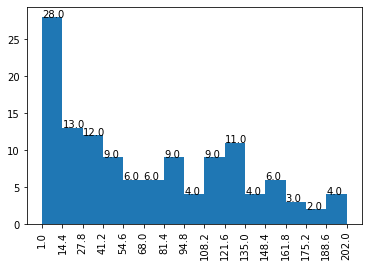

In [124]:
#Your code here
val = plt.hist(df2['Mins'], bins=15)

# Set ticks to be at the edge of the bins
plt.xticks(val[1], rotation=90)

# see the freq of each bar
for xy in zip(val[1], val[0]):
    plt.annotate(f'{xy[1]}',xy = xy)

plt.show()

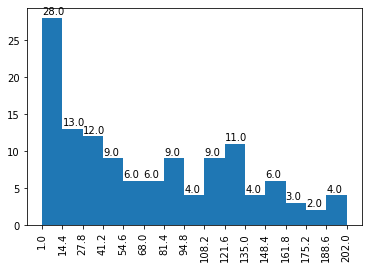

In [133]:
#Your code here
val = plt.hist(df2['Mins'], bins=15)

# Set ticks to be at the edge of the bins
plt.xticks(val[1], rotation=90)

# see the freq of each bar
for i,v in enumerate(val[0]):
    plt.text(x=val[1][i], y=v+0.5, s=str(v))

plt.show()


In [103]:
val[1]

array([  0.        ,  13.46666667,  26.93333333,  40.4       ,
        53.86666667,  67.33333333,  80.8       ,  94.26666667,
       107.73333333, 121.2       , 134.66666667, 148.13333333,
       161.6       , 175.06666667, 188.53333333, 202.        ])

In [130]:
val[0]

array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
        2.,  4.])